Imports:
* StandardScaler: It's good practice to scale input features so they have a similar range, which can
     help gradient descent converge faster.

In [20]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from LinearRegression import LinearRegression


****MODEL 1 Predict Petal Width (feature 3) from Petal Length (feature 2)****
Explanation:
   * X[:, 2].reshape(-1, 1): We select the third column (index 2, which is Petal Length) as our input
     feature. .reshape(-1, 1) is crucial; it changes the data from a flat array (150,) to a 2D array (150,
     1), which our model expects.
   * y_model1 = X[:, 3].reshape(-1, 1): Similarly, we select the fourth column (index 3, Petal Width) as
     our target value.
   * train_test_split(...): We create our main training and testing sets. random_state=42 is used to
     ensure that the split is the same every time you run the code, making your results reproducible.
   * StandardScaler(): We initialize the scaler. scaler.fit_transform(X_train) computes the mean and
     standard deviation from the training data and then scales it. scaler.transform(X_test) applies the
     same scaling transformation to the test data. We use transform (not fit_transform) on the test set to
     avoid "data leakage," i.e., giving our model information about the test set during training.

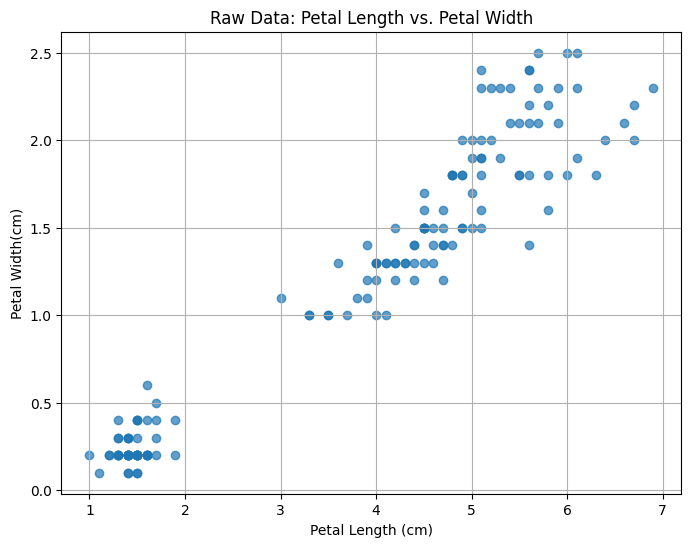

Early stopping at epoch 47
Training Complete!


In [48]:
iris = load_iris()
X = iris.data
y = iris.target_names[iris.target]#getting target names for context if needed

#----Model 1: Predict Petal Width (feature 3) from Petal Length (feature 2) ----
X_model1 = X[:, 2].reshape(-1,1) #input: Petal Length, reshape for single feature
y_model1 = X[:, 3].reshape(-1, 1) #target: Petal Width

#visualize  the raw data points
plt.figure(figsize=(8,6))
plt.scatter(X_model1, y_model1, alpha=0.7) #alpha=0.7: Makes the points slightly transparent, which helps visualize density if many points overlap
plt.title('Raw Data: Petal Length vs. Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width(cm)')
plt.grid(True)
plt.show()

#split into training (90%) and testing (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X_model1, y_model1, test_size = 0.1, random_state=42)

#scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#instantiate & train model
model_1 = LinearRegression(max_epochs= 200, patience= 5)
model_1.fit(X_train_scaled, y_train, learning_rate= 0.01)

print("Training Complete!")

* Sorting for Line Plot: np.argsort(X_test, axis=0).flatten() and subsequent indexing are used to sort
     the X_test data and its corresponding y_pred_scaled. This ensures that when plt.plot() connects the
     prediction points, it draws a smooth line rather than a jagged one.

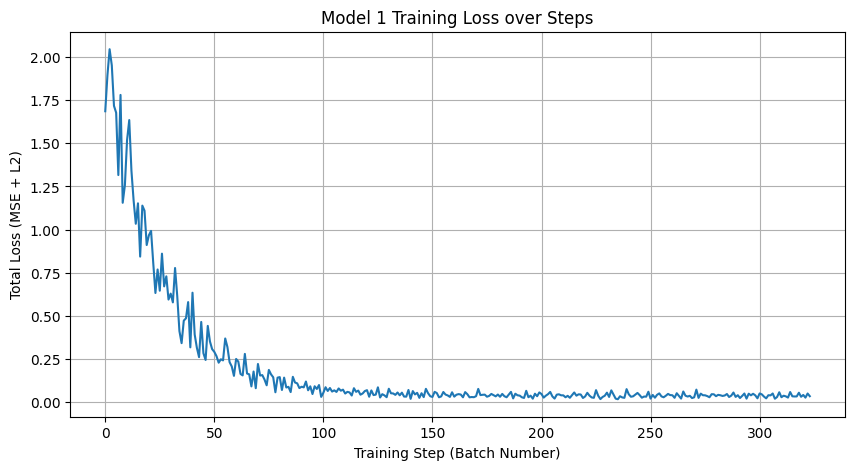

Model 1 Final Training Loss: 0.0357
Model 1 Learned Slope (Weight): 0.7196
Model 1 Learned Bias: 1.2031


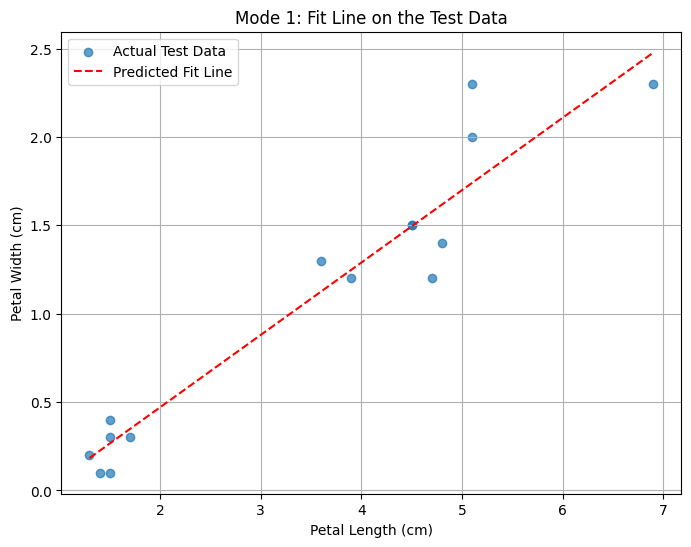

In [22]:
#plot training loss
plt.figure(figsize=(10,5))
plt.plot(model_1.losses)
plt.title('Model 1 Training Loss over Steps')
plt.xlabel('Training Step (Batch Number)')
plt.ylabel('Total Loss (MSE + L2)')
plt.grid(True)
plt.show()

#print final training loss
print(f"Model 1 Final Training Loss: {model_1.losses[-1]:.4f}")

#print slope (weight) and Bias
#for a single feature, single output model, weights represent the slope
print(f"Model 1 Learned Slope (Weight): {model_1.weights[0,0]:.4f}")
print(f"Model 1 Learned Bias: {model_1.bias[0,0]:.4f}")

#plot fit line on Test data
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, label='Actual Test Data', alpha = 0.7)#original test data points (unscaled for clarity)

#get predictions on the scaled test data
y_pred_scaled = model_1.predict(X_test_scaled)


#sort test data for a clean line plot
sort_idx = np.argsort(X_test, axis=0).flatten()
X_test_sorted = X_test[sort_idx]
y_pred_sorted = y_pred_scaled[sort_idx] #predictions are already on the y scale

plt.plot(X_test_sorted, y_pred_sorted, color='red', linestyle='--', label='Predicted Fit Line')
plt.title('Mode 1: Fit Line on the Test Data')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
#Save Model Parameters
params_dir = "ModelParams"
os.makedirs(params_dir, exist_ok=True)#create dir is not already there
model_1_params_path = os.path.join(params_dir, "model_1_params.npz")
model_1.save(model_1_params_path)
print(f"Model 1 Parameters saved to {model_1_params_path}")

Model 1 Parameters saved to ModelParams/model_1_params.npz


In [25]:
#evaluate Model 1
test_mse = model_1.score(X_test_scaled, y_test)
print(f"Model 1 Mean Squared Error on Test Set: {test_mse:.4f}")

Model 1 Mean Squared Error on Test Set: 0.0466


**MODEL 2: Predict Sepal Width (feature 1) from Sepal Length (feature 0)**


From here on out code will be almost exactly the same as above and follow the same pattern, only changing variable names to fit different models/data used

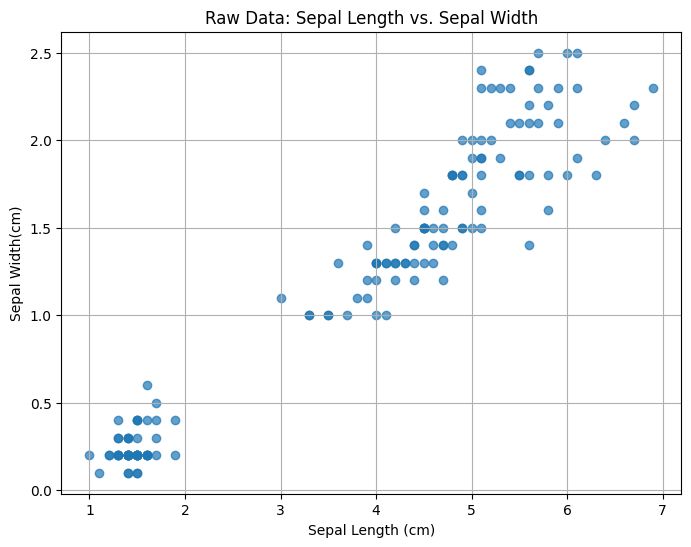

Early stopping at epoch 72
Training Complete!


In [38]:
#----Model 2: Predict Sepal Width (feature 3) from Sepal Length (feature 2) ----
X_model2 = X[:, 0].reshape(-1,1) #input: Sepal Length (index 0)
y_model2 = X[:, 1].reshape(-1, 1) #target: Sepal width (index 1)

#visualize  the raw data points
plt.figure(figsize=(8,6))
plt.scatter(X_model1, y_model1, alpha=0.7) #alpha=0.7: Makes the points slightly transparent, which helps visualize density if many points overlap
plt.title('Raw Data: Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width(cm)')
plt.grid(True)
plt.show()

#split into training (90%) and testing (10%) sets
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X_model2, y_model2, test_size = 0.1, random_state=42)

#scale the features
scaler_m2 = StandardScaler()
X_train_scaled_m2 = scaler_m2.fit_transform(X_train_m2)
X_test_scaled_m2 = scaler_m2.transform(X_test_m2)

#instantiate & train model
model_2 = LinearRegression(max_epochs= 200, patience= 5)
model_2.fit(X_train_scaled_m2, y_train_m2, learning_rate= 0.01)

print("Training Complete!")

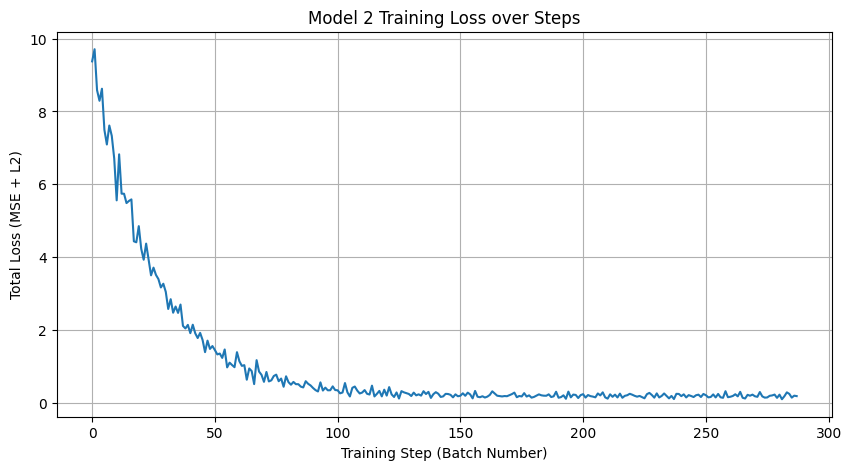

Model 2 Final Training Loss: 0.1838
Model 2 Learned Slope (Weight): -0.0287
Model 2 Learned Bias: 3.0462


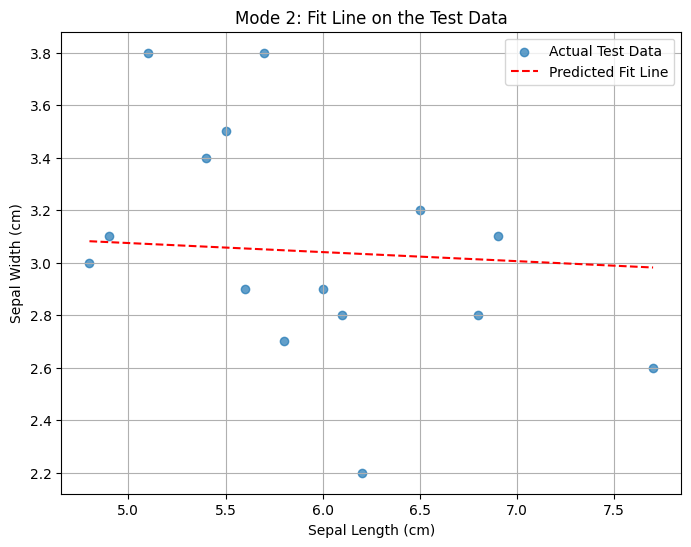

In [39]:
#plot training loss
plt.figure(figsize=(10,5))
plt.plot(model_2.losses)
plt.title('Model 2 Training Loss over Steps')
plt.xlabel('Training Step (Batch Number)')
plt.ylabel('Total Loss (MSE + L2)')
plt.grid(True)
plt.show()

#print final training loss
print(f"Model 2 Final Training Loss: {model_2.losses[-1]:.4f}")

#print slope (weight) and Bias
#for a single feature, single output model, weights represent the slope
print(f"Model 2 Learned Slope (Weight): {model_2.weights[0,0]:.4f}")
print(f"Model 2 Learned Bias: {model_2.bias[0,0]:.4f}")

#plot fit line on Test data
plt.figure(figsize=(8,6))
plt.scatter(X_test_m2, y_test_m2, label='Actual Test Data', alpha = 0.7)#original test data points (unscaled for clarity)

#get predictions on the scaled test data
y_pred_scaled_m2 = model_2.predict(X_test_scaled_m2)


#sort test data for a clean line plot
sort_idx_m2 = np.argsort(X_test_m2, axis=0).flatten()
X_test_sorted_m2 = X_test_m2[sort_idx_m2]
y_pred_sorted_m2 = y_pred_scaled_m2[sort_idx_m2] #predictions are already on the y scale

plt.plot(X_test_sorted_m2, y_pred_sorted_m2, color='red', linestyle='--', label='Predicted Fit Line')
plt.title('Mode 2: Fit Line on the Test Data')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
#Save Model 2 Params
params_dir = "ModelParams"
os.makedirs(params_dir, exist_ok=True)#create dir is not already there
model_2_params_path = os.path.join(params_dir, "model_2_params.npz")
model_2.save(model_2_params_path)
print(f"Model 2 Parameters saved to {model_2_params_path}")

Model 2 Parameters saved to ModelParams/model_2_params.npz


In [45]:
#Evaluate Model 2
test_mse_m2 = model_2.score(X_test_scaled_m2, y_test_m2)
print(f"Model 2 Mean Squared Error on Test Set: {test_mse_m2:.4f}")


Model 2 Mean Squared Error on Test Set: 0.1703


**MODEL 3**

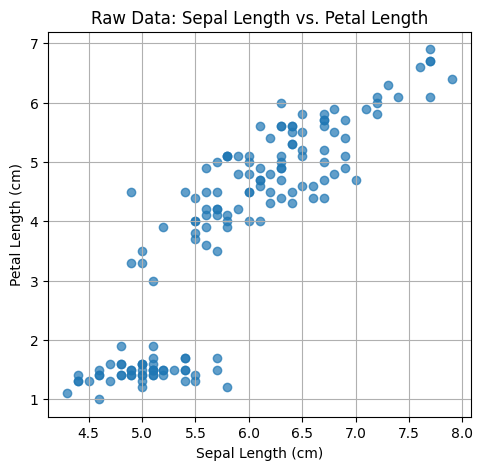

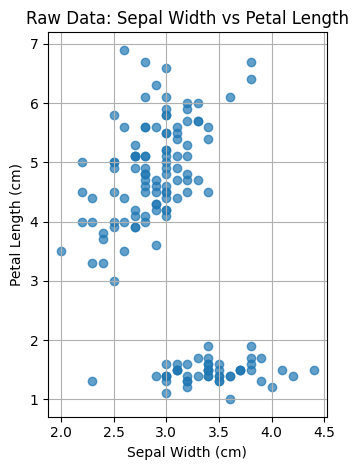

Training Complete!


In [53]:
#----Model 3: Predict Petal Length (feature 2) from Sepal Length (feature 0) and Sepal Width (feature 1) ----
X_model3 = X[:, :2] #input: Sepal Length (index 0) and Sepal Width
y_model3 = X[:, 2].reshape(-1, 1) #target: Petal width (index 2)

#visualize  the raw data points
#Since we have 2 input features, a simple 2D scatter plot vs output is not a single line
#we can plot each input feature against the output
plt.figure(figsize=(12,5))

plt.subplot(1,2,1) #1 row, 2 columns, first plot
plt.scatter(X_model3[:, 0], y_model3, alpha=0.7) #alpha=0.7: Makes the points slightly transparent, which helps visualize density if many points overlap
plt.title('Raw Data: Sepal Length vs. Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.grid(True)
plt.show()

plt.subplot(1,2,2) #1 row, 2 columns, second plot
plt.scatter(X_model3[:, 1], y_model3, alpha=0.7)
plt.title('Raw Data: Sepal Width vs Petal Length')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.grid(True)

plt.tight_layout()#adjusts subplot params for a tight layout
plt.show()

#split into training (90%) and testing (10%) sets
X_train_m3, X_test_m3, y_train_m3, y_test_m3 = train_test_split(X_model3, y_model3, test_size = 0.1, random_state=42)

#scale the features
scaler_m3 = StandardScaler()
X_train_scaled_m3 = scaler_m3.fit_transform(X_train_m3)
X_test_scaled_m3 = scaler_m3.transform(X_test_m3)

#instantiate & train model
model_3 = LinearRegression(max_epochs= 200, patience= 5)
model_3.fit(X_train_scaled_m3, y_train_m3, learning_rate= 0.01)

print("Training Complete!")

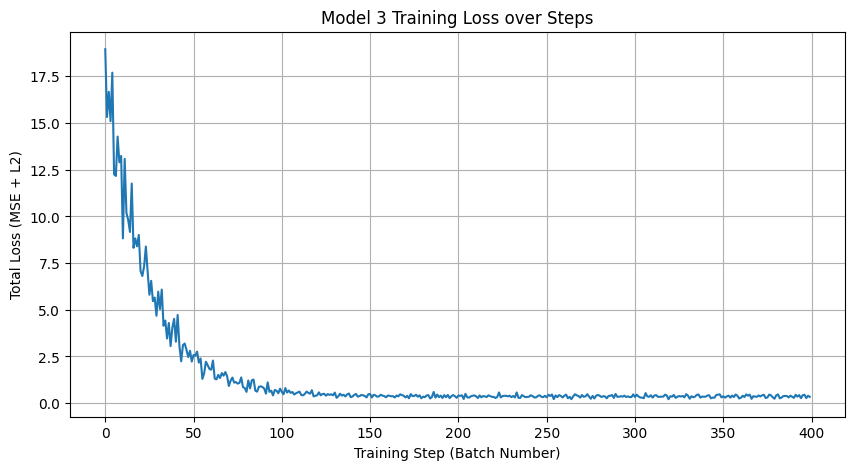

Model 2 Final Training Loss: 0.3373
Model 3 Learned Weights: [ 1.46295974 -0.58001715]
Model 3 Learned Bias: 3.7595


In [54]:
#plot training loss
plt.figure(figsize=(10,5))
plt.plot(model_3.losses)
plt.title('Model 3 Training Loss over Steps')
plt.xlabel('Training Step (Batch Number)')
plt.ylabel('Total Loss (MSE + L2)')
plt.grid(True)
plt.show()

#print final training loss
print(f"Model 2 Final Training Loss: {model_3.losses[-1]:.4f}")

#print final weights and bias for model 3
#for a multi-feature model, weights are a vector, not a single slope.
print(f"Model 3 Learned Weights: {model_3.weights.flatten()}")#flatten to show as a 1D array for readability
print(f"Model 3 Learned Bias: {model_3.bias[0,0]:.4f}")

#Visualizing a fit line for a 2-input model in 2D is not straightfoward
#it would represent a plane in 3D space.


In [55]:
#Save Model 3 Params
params_dir = "ModelParams"
os.makedirs(params_dir, exist_ok=True)#create dir is not already there
model_3_params_path = os.path.join(params_dir, "model_3_params.npz")
model_3.save(model_3_params_path)
print(f"Model 3 Parameters saved to {model_3_params_path}")

Model 3 Parameters saved to ModelParams/model_3_params.npz


In [ ]:
# --- Evaluate Model 3 on Test Set ---
test_mse_m3 = model_3.score(X_test_scaled_m3, y_test_m3)
print(f"Model 3 Mean Squared Error on Test Set: {test_mse_m3:.4f}")